# Support Vector Machines (SVM)

**Task:** Predict concrete comprensive strength in MPa (Mega Pascals) given a number of features such as cement, ash, water etc. using support vector machines. 

The [Concrete Compressive Strength Data Set](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) is a collection of measurements of the compressive strength of concrete. It is available on the UCI Machine Learning Repository and contains data from 1030 samples of concrete, with eight input features such as cement, water, and coarse aggregate, and a single output variable, the compressive strength.

Explanation of each variable in the Concrete Compressive Strength Dataset:

1. Cement (kg/m3): The amount of cement used in the concrete mixture, measured in kilograms per cubic meter.

2. Blast Furnace Slag (kg/m3): The amount of blast furnace slag used in the concrete mixture, measured in kilograms per cubic meter.

3. Fly Ash (kg/m3): The amount of fly ash used in the concrete mixture, measured in kilograms per cubic meter.

4. Water (kg/m3): The amount of water used in the concrete mixture, measured in kilograms per cubic meter.

5. Superplasticizer (kg/m3): The amount of superplasticizer used in the concrete mixture, measured in kilograms per cubic meter.

6. Coarse Aggregate (kg/m3): The amount of coarse aggregate (such as gravel or crushed stone) used in the concrete mixture, measured in kilograms per cubic meter.

7. Fine Aggregate (kg/m3): The amount of fine aggregate (such as sand) used in the concrete mixture, measured in kilograms per cubic meter.

8. Age (days): The age of the concrete sample at the time of testing, measured in days.

9. Concrete Compressive Strength (MPa): The compressive strength of the concrete sample, measured in megapascals (MPa). This is the target variable that we are trying to predict.

In [1]:
#import relevant packages
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#import data from local directory
df = pd.read_csv("https://raw.githubusercontent.com/kashifliaqat/Data_Science_and_Machine-Learning/main/Supervised_Learning/3_Single_Neuron_Linear_Regression/dataset/Concrete_Data.csv")

#### Data Visualization and Exploration
A detailed visualization and exploration of the dataset can be found in the [Single_Neuron_Regression](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/3_Single_Neuron_Linear_Regression/regression.ipynb) notebook.

In [3]:
# Show the first 5 rows of the dataset
print(df.head())
print("Target Variable is Strength (Compressive strength of Concrete in MPa)")

   Cement   Slag  Ash  Water  Superplasticizer  Coarse   Fine  Age  Strength
0   540.0    0.0  0.0  162.0               2.5  1040.0  676.0   28     79.99
1   540.0    0.0  0.0  162.0               2.5  1055.0  676.0   28     61.89
2   332.5  142.5  0.0  228.0               0.0   932.0  594.0  270     40.27
3   332.5  142.5  0.0  228.0               0.0   932.0  594.0  365     41.05
4   198.6  132.4  0.0  192.0               0.0   978.4  825.5  360     44.30
Target Variable is Strength (Compressive strength of Concrete in MPa)


### Data Splitting and Scaling
Split the data into test and train sets. 

In [4]:
# split into features and target
X = df.drop(columns=['Strength'])
y = df['Strength']

# normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Training

Stepwise implementation of the SVR model using the scikit-learn library.

1. Define the SVR model using the `SVR` class from the `sklearn.svm` module. Set the kernel to 'rbf' and gamma to 0.1. This initializes the model with the specified hyperparameters.
2. Define k-fold cross-validation using the `KFold` class from the `sklearn.model_selection` module. Set the number of splits to 5, and set `shuffle=True` to shuffle the data before splitting it into folds. Set `random_state=42` to ensure that the same random seed is used each time the code is run.
3. Fit the SVR model to the training data using the `cross_val_score()` function from the `sklearn.model_selection` module. The `cross_val_score()` function performs k-fold cross-validation, where the model is trained on k-1 folds and evaluated on the remaining fold. The function returns an array of R-squared scores, one for each fold of the cross-validation.
4. Print the R-squared scores for each fold of the cross-validation, and print the mean R-squared score across all folds.
5. Fit the SVR model to the entire training dataset using the `fit()` method. This trains the model on all of the available training data.

In [5]:
# define the SVM model
model = SVR(kernel='rbf', gamma=0.1)
# define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# fit the model with k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print(f"R2 scores: {scores}")
print(f"Mean Cross-Validation R2: {np.mean(scores):.3f}")

# fit the model on the whole training set and make predictions on the test set
model.fit(X_train, y_train)

R2 scores: [0.64844843 0.61154104 0.59379851 0.62220171 0.64969667]
Mean Cross-Validation R2: 0.625


SVR(gamma=0.1)

#### Perfromance Evaluation

In [6]:
# make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate training error
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate testing error
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Training MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_train, mae_train, mse_train, r2_train))
print("Testing MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_test, mae_test, mse_test, r2_test))


Training MAPE: 30.72%, MAE: 7.35, MSE: 91.64, R2: 0.68
Testing MAPE: 30.42%, MAE: 7.54, MSE: 88.74, R2: 0.66


### Visualization of Predicted vs Actual Values

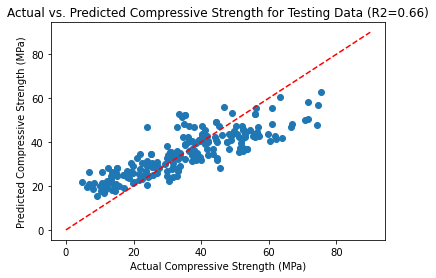

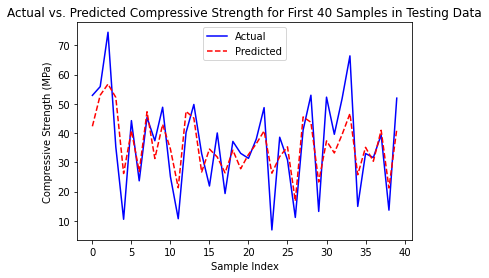

In [7]:
# Plot actual vs predicted values for testing data
plt.scatter(y_test, y_pred_test)
plt.plot([0, 90], [0, 90], 'r--')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for Testing Data (R2={:.2f})'.format(r2_test))
plt.show()

# Plot actual vs predicted values for samples in testing data
n_samples = 40
indices = np.arange(n_samples)
plt.plot(indices, y_test[:n_samples], 'b-', label='Actual')
plt.plot(indices, y_pred_test[:n_samples], 'r--', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for First {} Samples in Testing Data'.format(n_samples))
plt.legend()
plt.show()

- The model is not able to predict the values accurately. We can use hyperparameter tuning to improve the performance of the model.

### Hyperparameter Tuning using GridSearchCV
GridSearchCV is a hyperparameter tuning method that is used to find the optimal hyperparameters for a model. It is an exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Best Parameters: {'C': 10, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}
Training MAPE: 16.04%, MAE: 4.28, MSE: 40.37, R2: 0.86
Testing MAPE: 17.86%, MAE: 5.33, MSE: 52.41, R2: 0.80


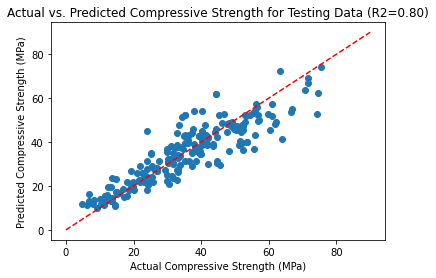

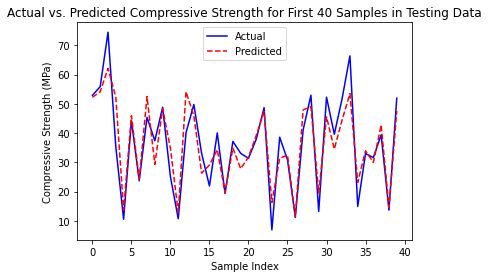

In [8]:
from sklearn.metrics import make_scorer
# Creating an SVM regressor object
svr = SVR()

# set up the grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'epsilon': [0.001, 0.01, 0.1, 1],
}

# define the scoring metrics to use
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)
}

# perform a grid search using cross-validation
grid_reg = GridSearchCV(svr, param_grid=param_grid, cv=5, scoring=scoring, refit='r2')
grid_reg.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best Parameters:", grid_reg.best_params_)


# Predicting the values on training and testing sets
y_train_pred = grid_reg.predict(X_train)
y_test_pred = grid_reg.predict(X_test)

# Calculating the mean absolute percentage error on training and testing sets
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Calculating the mean absolute error on training and testing sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating the mean squared error on training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculating the R-squared score on training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("Training MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_train, mae_train, mse_train, r2_train))
print("Testing MAPE: {:.2f}%, MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mape_test, mae_test, mse_test, r2_test))

# Plot actual vs predicted values for testing data
plt.scatter(y_test, y_test_pred)
plt.plot([0, 90], [0, 90], 'r--')
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for Testing Data (R2={:.2f})'.format(r2_test))
plt.show()

# Plot actual vs predicted values for samples in testing data
n_samples = 40
indices = np.arange(n_samples)
plt.plot(indices, y_test[:n_samples], 'b-', label='Actual')
plt.plot(indices, y_test_pred[:n_samples], 'r--', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength for First {} Samples in Testing Data'.format(n_samples))
plt.legend()
plt.show()

#### Conclusion
- The SVM model was able to predict the concrete compressive strength with a mape of 30.42% without hyperparameter tuning.
- The mape was reduced to 17.86% after hyperparameter tuning.
- GridSearchCV significantly improved the performance of the model. 

**Comparison**
- The test MSE after hyperparameter tuning is found to be 52.41. This is significantly lower than the MSE (98.27) reported using [Single Neuron Linear Regression](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/3_Single_Neuron_Linear_Regression/regression.ipynb) but higher than the MSE (29.76) of [Random Forest Regressor](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/8_Ensemble_Random_Forest/random_forest.ipynb).

Among the three models used, the Random Forest Regressor performed the best for concrete compressive strength prediction.

